# Analysis of Local Group Dwarf Galaxy Characteristics

In [1]:
# importing python packages we need to use
import csv
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
#print the versions of each python package used
print('\n'.join(f'{m.__name__}=={m.__version__}' for m in globals().values() if getattr(m, '__version__', None)))

csv==1.0
numpy==1.17.2
pandas==0.25.1
seaborn==0.9.0


In [3]:
#Make the plots high res
plt.rcParams['figure.dpi']= 300

In [4]:
galaxies = pd.read_csv('./dwarfs.csv')

## Change M_* to M_star

In [5]:
galaxies.loc[galaxies['GalaxyName']== 'Antlia2', 'M_star'] = 0.88

In [6]:
galaxies.drop('M_*', axis=1, inplace=True)

## Look at Data

In [7]:
#Look at the Pandas dataframe named galaxies
galaxies

,Unnamed: 0,GalaxyName,RA_hr,RA_min,RA_sec,Dec_deg,Dec_arcmin,Dec_arcsec,EB-V,m-M,...,r_apo_err2,v_apo_mean,v_apo_median,v_apo_std,n_halo_apo,n_halo_apo_err1,n_halo_apo_err2,ell_surf_log10_abs,min_dist_mw_or_m31,Closer_MW_M31
0,0,#TheGalaxy,17.0,45.0,40.0,-29.0,0.0,28.0,9.999,99.99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,#*CanisMajor,7.0,12.0,35.0,-27.0,40.0,0.0,0.264,14.29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,SagittariusdSph,18.0,55.0,19.5,-30.0,32.0,43.0,0.153,17.10,...,12.227629,104.536117,105.278226,8.764286,0.004338,0.000753,0.001042,-2.325838,18.587576,MW
3,3,TucanaIII,23.0,56.0,36.0,-59.0,36.0,0.0,9.999,17.01,...,1.745390,36.939552,37.089534,3.743090,0.000098,0.000089,0.000177,-2.318699,23.298941,MW
4,4,DracoII,15.0,52.0,47.6,64.0,33.0,55.0,0.016,16.90,...,26.110572,77.314244,77.777376,12.929979,0.000521,0.000460,0.000959,-2.330260,26.126576,MW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,138,HydrusI,2.0,29.0,33.3,-79.0,18.0,32.0,NaN,17.20,...,25.920137,73.949053,73.697460,9.908038,0.000494,0.000187,0.000267,-2.310180,25.741743,MW
139,139,CarinaII,7.0,36.0,25.5,-57.0,59.0,57.0,NaN,17.79,...,61.056593,49.882156,50.330522,7.637017,0.001654,0.001038,0.001686,-2.285622,37.296364,MW
140,140,CarinaIII,7.0,38.0,31.1,-57.0,53.0,59.0,NaN,17.22,...,226.758301,61.517261,55.847231,28.095470,0.003703,0.003150,0.010406,-2.303074,29.180644,MW
141,141,CraterII,11.0,49.0,14.4,-18.0,24.0,47.0,NaN,20.35,...,6.749871,80.577944,81.659607,19.234086,0.000411,0.000158,0.000361,-2.122559,116.471698,MW


In [8]:
#List the column names of the dataframe galaxies
list(galaxies.columns)

['Unnamed: 0',
 'GalaxyName',
 'RA_hr',
 'RA_min',
 'RA_sec',
 'Dec_deg',
 'Dec_arcmin',
 'Dec_arcsec',
 'EB-V',
 'm-M',
 'm-M_err_pos',
 'm-M_err_neg',
 'vh(km/s)',
 'Vmag',
 'Vmag_err_pos',
 'Vmag_err_neg',
 'PA',
 'e=1-b/a',
 'muVo',
 "rh(')",
 'rh_err_pos',
 'rh_err_neg',
 'vsig_s_x',
 'vsig_err_pos',
 'vsig_err_neg',
 'vrot_s',
 'vrot_s_err_pos',
 'vrot_s_err_neg',
 'MHI',
 'Data',
 'Key',
 'vsig_g',
 'vsig_g_err_pos',
 'vsig_g_err_neg',
 'vrot_g',
 'note',
 'M-m',
 'Notes',
 'ra',
 'dec',
 'M_V',
 'dist_kpc',
 'M_dyn',
 'vh_(km/s)_err',
 'vsig_s_upper_limit',
 'vsig_s_err',
 'vh(km/s)_err',
 'orb_pericenter',
 'orb_apocenter',
 'orb_eccentricity',
 'orb_period',
 'orb_period_type',
 'orb_pericenter_ref',
 'orb_pericenter_0.8',
 'orb_apocenter_0.8',
 'orb_eccentricity_0.8',
 'tau_50',
 'tau_90',
 'vsig_s_ref',
 'vsig_s_err_pos_ref',
 'vsig_s_err_neg_ref',
 'M_V_ref',
 'rh_pc_ref',
 'rh_pc_err_pos_ref',
 'rh_pc_err_neg_ref',
 'vh(km/s)_ref',
 'dist_kpc_ref',
 'refs',
 'M_star',
 'M

Text(0, 0.5, 'M$_{HI}$ [M$_{\\odot}$]')

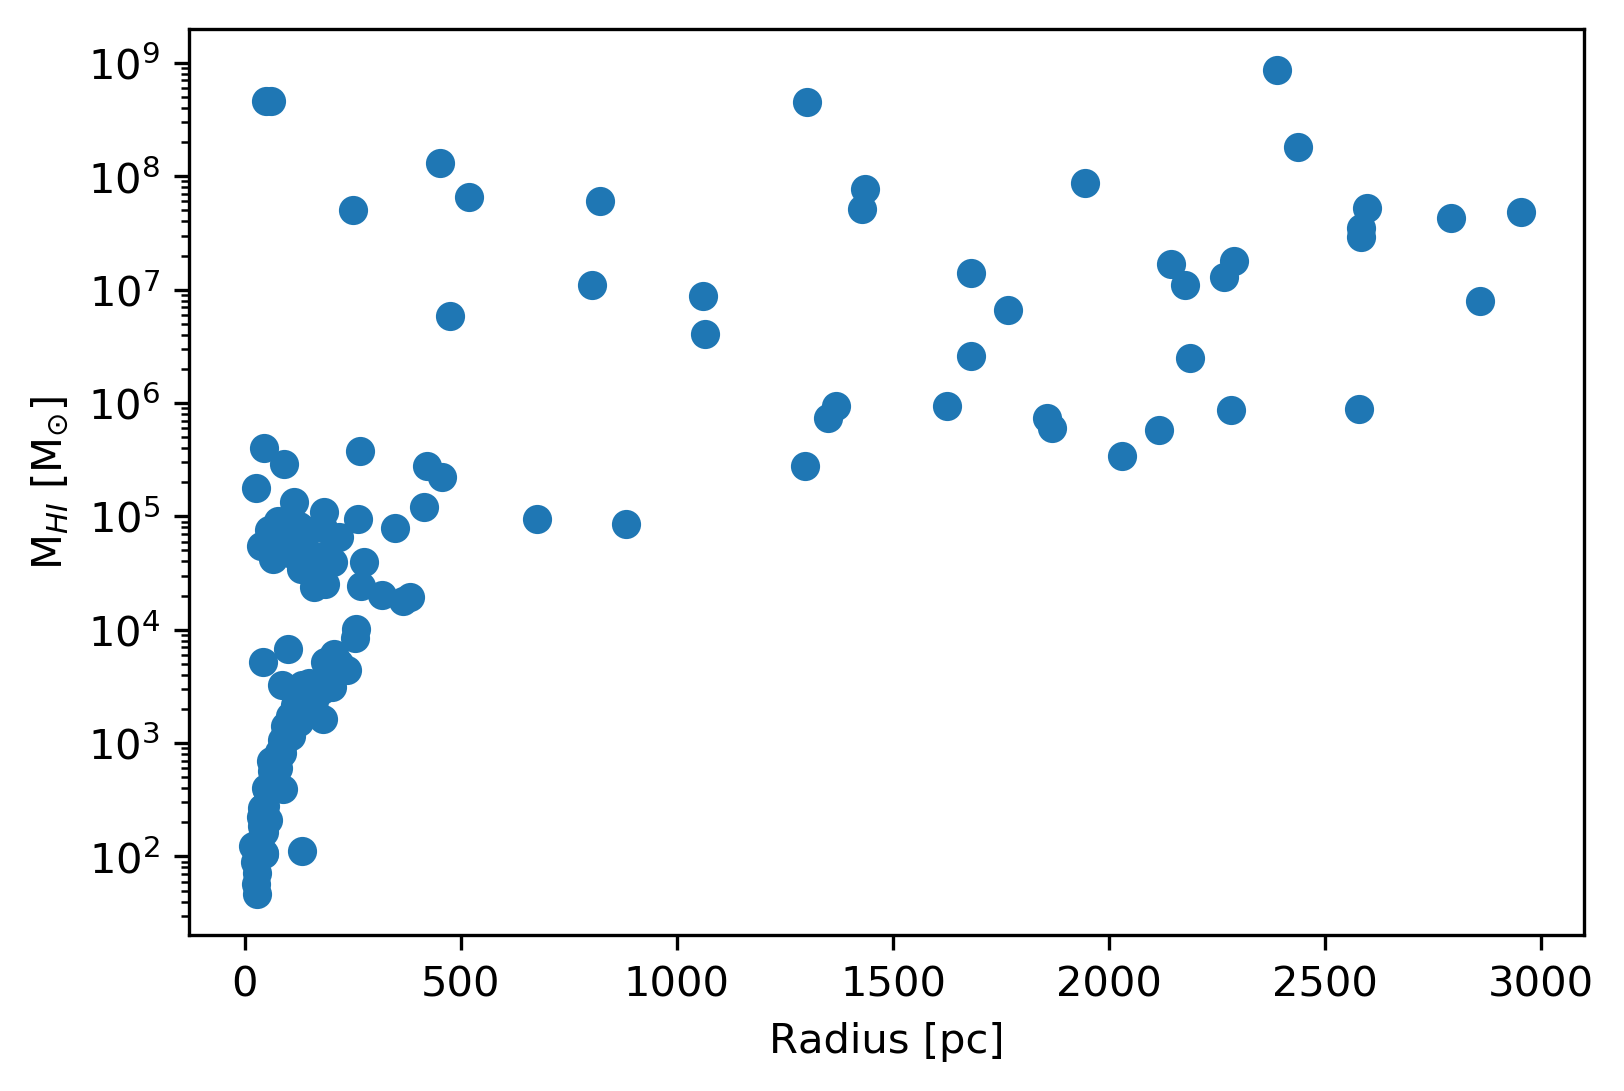

In [9]:
#Simple plot of the minimum distance to the Milky Way center or M31's center (whichever is closer)
#vs the neutral hydrogen (HI) mass, which might represent either a detected mass
#*or* the upper limit on the HI mass in the case of non-detections.
plt.scatter(galaxies['min_dist_mw_or_m31'],galaxies['MHI_computed'])
plt.yscale('log')
plt.xlabel('Radius [pc]')
plt.ylabel('M$_{HI}$ [M$_{\odot}$]')

In [10]:
#HI mass limits are denoted by the MHI_type column
#This displays a subset of columns of the full dataframe
#You can see many of the MHI_computed values are upper limits

galaxies[['GalaxyName','MHI_computed','MHI_type']]

,GalaxyName,MHI_computed,MHI_type
0,#TheGalaxy,NaN,NaN
1,#*CanisMajor,NaN,NaN
2,SagittariusdSph,122.454082,upper_limit
3,TucanaIII,90.189022,upper_limit
4,DracoII,56.714447,upper_limit
...,...,...,...
138,HydrusI,124.584324,upper_limit
139,CarinaII,220.814382,upper_limit
140,CarinaIII,101.226583,upper_limit
141,CraterII,3010.646100,upper_limit


## Add in W50s for gas-containing dwarfs

In [11]:
W50s = pd.read_csv('./putman21_dwarf_files/gaseous_dwarf_lg.csv')

In [12]:
W50s

,Name,RA (J2000),DE (J2000),Distance,sigDist,MHI,W50,Vhelio
0,LMC,80.892,-69.756,51.0,2.0,460000000.0,80.064,262.0
1,SMC,13.187,-72.829,64.0,4.0,460000000.0,90.000,146.0
2,Leo T,143.721,17.051,409.0,27.0,280000.0,19.545,38.0
3,Phoenix,27.775,-44.445,415.0,19.0,120000.0,16.484,-13.0
4,NGC 6822,296.238,-14.789,459.0,17.0,130000000.0,80.000,-55.0
5,NGC 185,9.742,48.338,617.0,26.0,110000.0,36.029,-204.0
6,IC 1613,16.200,2.118,755.0,42.0,65000000.0,27.000,-232.0
7,LGS3,15.979,21.885,769.0,25.0,380000.0,21.429,-287.0
8,IC 10,5.071,59.304,794.0,44.0,50000000.0,62.000,-348.0
9,Leo A,149.858,30.746,798.0,44.0,11000000.0,19.000,24.0


In [13]:
#Rename the pandas dataframe column just to make the merge easier
W50s.rename(columns={'Name': 'GalaxyName'},inplace=True)

In [14]:
W50s.dtypes

GalaxyName     object
RA (J2000)    float64
DE (J2000)    float64
Distance      float64
sigDist       float64
MHI           float64
W50           float64
Vhelio        float64
dtype: object

In [15]:
galaxies.dtypes

Unnamed: 0              int64
GalaxyName             object
RA_hr                 float64
RA_min                float64
RA_sec                float64
                       ...   
n_halo_apo_err1       float64
n_halo_apo_err2       float64
ell_surf_log10_abs    float64
min_dist_mw_or_m31    float64
Closer_MW_M31          object
Length: 184, dtype: object

In [16]:
#Merge the two datasets, info about merging here: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
result = pd.merge(galaxies, W50s, on="GalaxyName", how="left")

In [17]:
list(result['GalaxyName'])

['#TheGalaxy',
 '#*CanisMajor',
 'SagittariusdSph',
 'TucanaIII',
 'DracoII',
 'Segue1',
 'Reticulum2',
 'CetusII',
 'TriangulumII',
 'UrsaMajorII',
 'BootesII',
 'SegueII',
 'Willman1',
 'ComaBerenices',
 'TucanaIV',
 'BootesIII',
 'GrusII',
 'LMC',
 'TucanaV',
 'TucanaII',
 'SagittariusII',
 'SMC',
 'Bootes',
 'Draco',
 'UrsaMinor',
 'HorologiumII',
 'Horologium1',
 'Eridanus3',
 'Phoenix2',
 'Sculptor',
 'Sextans',
 'ReticulumIII',
 'IndusI',
 'UrsaMajor',
 'GrusI',
 'Pictoris1',
 'Carina',
 'Hercules',
 'HydraII',
 'Fornax',
 'LeoIV',
 'CanesVenaticiII',
 'LeoV',
 'PiscesII',
 'ColumbaI',
 'PegasusIII',
 'IndusII',
 'CanesVenatici(I)',
 'LeoII',
 'LeoI',
 '#Andromeda',
 'M32',
 'AndromedaIX',
 'NGC205',
 'AndromedaI',
 'AndromedaXVII',
 'AndromedaXXVII',
 'AndromedaIII',
 'AndromedaXXV',
 'AndromedaXXVI',
 'AndromedaV',
 'AndromedaXI',
 'AndromedaXIX',
 'AndromedaXXIII',
 'AndromedaXX',
 'AndromedaXIII',
 'AndromedaX',
 'AndromedaXXI',
 'CassiopeiaIII',
 'NGC147',
 'AndromedaXXX',


In [18]:
result[['GalaxyName','W50']]

,GalaxyName,W50
0,#TheGalaxy,NaN
1,#*CanisMajor,NaN
2,SagittariusdSph,NaN
3,TucanaIII,NaN
4,DracoII,NaN
...,...,...
138,HydrusI,NaN
139,CarinaII,NaN
140,CarinaIII,NaN
141,CraterII,NaN


In [49]:
#Check all the W50 values "made it" through the merge
result['W50'].count()

10

In [50]:
#rename the result of the merge back to galaxies
galaxies = result

## Make csv output with names

In [21]:
#Select out the columns of interest from the list of all galaxy features
cols = ['GalaxyName','l','b','angle_from_l=0','angle_from_MW_plane','dist_pc','min_dist_mw_or_m31','orb_pericenter','orb_apocenter','orb_eccentricity','orb_period','rh(\')','rh_pc','M_V','ell_surf_dist','M_dyn','vsig_s','vrot_s','vsig_g','vrot_g','W50','muVo','vh(km/s)','tau_90','[Fe/H]','V_GSR','V_LSR','V_LGSR','MHI_computed','X','Y','Z']
LGcatalog = galaxies[cols]

In [22]:
d ={'GalaxyName':'Galaxy Name','l':'l','b':'b','angle_from_l=0':'Angle from l=0','angle_from_MW_plane':'Angle from MW plane','dist_pc': 'Distance','min_dist_mw_or_m31': 'Dist MW or M31, nearest','orb_pericenter': 'Orbit Pericenter','orb_apocenter': 'Orbit Apocenter','orb_eccentricity':'Orbit Eccentricity','orb_period': 'Orbit Period','rh(\')': 'Angular Radius','rh_pc':'Radius [pc]','M_V': 'V band Magnitude M$_{V}$','ell_surf_dist': 'Distance to LG surf','M_dyn': 'Estimated Dynamical Mass','vsig_s': 'Stellar Velocity Dispersion $\sigma_{star}$','vrot_s': 'Stellar Rotation Velocity $V_{rot,star}$','vsig_g': 'HI Velocity Dispersion $\sigma_{gas}$','vrot_g': 'HI Rotation Velocity $V_{rot,gas}$','W50':'W50','muVo': 'Surface Brightness $\mu_{V}$','vh(km/s)':'Heliocentric Velocity $v_{helio}$','tau_90':"Star Formation Timescale $\\tau_{90}$",'[Fe/H]':'Mean Metallicity $\\langle $[Fe/H]$\\rangle $','V_GSR':'Galactocentric Velocity $V_{GSR}$','V_LSR':'Local Std of Rest Velocity $V_{LSR}$','V_LGSR':'Local Group Std of Rest Velocity $V_{LGSR}$','MHI_computed':'HI Mass $M_{HI}$ (Detected or Limit)','X':'3D Position (X)','Y':'3D Position (Y)','Z':'3D Position (Z)'}
cols = ['l','b','angle_from_l=0','angle_from_MW_plane','dist_pc','min_dist_mw_or_m31','orb_pericenter','orb_apocenter','orb_eccentricity','orb_period','rh(\')','rh_pc','M_V','ell_surf_dist','M_dyn','vsig_s','vrot_s','vsig_g','vrot_g','muVo','vh(km/s)','tau_90','[Fe/H]','V_GSR','V_LSR','V_LGSR','MHI_computed','X','Y','Z']
cols = np.array([d[x] for x in cols])
LGcatalog = LGcatalog.rename(columns=d)

In [23]:
LGcatalog.to_csv('LocalGroupData.csv', index = False)

## Replace dataframe column names with readable & descriptive names

In [24]:
#Select out the columns of interest from the list of all galaxy features
cols = ['l','b','angle_from_l=0','angle_from_MW_plane','dist_pc','min_dist_mw_or_m31','orb_pericenter','orb_apocenter','orb_eccentricity','orb_period','rh(\')','rh_pc','M_V','ell_surf_dist','M_dyn','vsig_s','vrot_s','vsig_g','vrot_g','W50','muVo','vh(km/s)','tau_90','[Fe/H]','V_GSR','V_LSR','V_LGSR','MHI_computed','X','Y','Z']
galaxies = galaxies[cols]

In [25]:
#Rename the columns to something more readable. 
#This should better identify what each column represents,
#but you may need more info about some to be able to interpret some of them.

d ={'l':'l','b':'b','angle_from_l=0':'Angle from l=0','angle_from_MW_plane':'Angle from MW plane','dist_pc': 'Distance','min_dist_mw_or_m31': 'Dist MW or M31, nearest','orb_pericenter': 'Orbit Pericenter','orb_apocenter': 'Orbit Apocenter','orb_eccentricity':'Orbit Eccentricity','orb_period': 'Orbit Period','rh(\')': 'Angular Radius','rh_pc':'Radius [pc]','M_V': 'V band Magnitude M$_{V}$','ell_surf_dist': 'Distance to LG surf','M_dyn': 'Estimated Dynamical Mass','vsig_s': 'Stellar Velocity Dispersion $\sigma_{star}$','vrot_s': 'Stellar Rotation Velocity $V_{rot,star}$','vsig_g': 'HI Velocity Dispersion $\sigma_{gas}$','vrot_g': 'HI Rotation Velocity $V_{rot,gas}$','W50':'W50','muVo': 'Surface Brightness $\mu_{V}$','vh(km/s)':'Heliocentric Velocity $v_{helio}$','tau_90':"Star Formation Timescale $\\tau_{90}$",'[Fe/H]':'Mean Metallicity $\\langle $[Fe/H]$\\rangle $','V_GSR':'Galactocentric Velocity $V_{GSR}$','V_LSR':'Local Std of Rest Velocity $V_{LSR}$','V_LGSR':'Local Group Std of Rest Velocity $V_{LGSR}$','MHI_computed':'HI Mass $M_{HI}$ (Detected or Limit)','X':'3D Position (X)','Y':'3D Position (Y)','Z':'3D Position (Z)'}
cols = ['l','b','angle_from_l=0','angle_from_MW_plane','dist_pc','min_dist_mw_or_m31','orb_pericenter','orb_apocenter','orb_eccentricity','orb_period','rh(\')','rh_pc','M_V','ell_surf_dist','M_dyn','vsig_s','vrot_s','vsig_g','vrot_g','muVo','vh(km/s)','tau_90','[Fe/H]','V_GSR','V_LSR','V_LGSR','MHI_computed','X','Y','Z']
cols = np.array([d[x] for x in cols])
galaxies = galaxies.rename(columns=d)

In [26]:
galaxies.to_csv('LocalGroupData.csv', index = False)

## Spearman Correlation Example

In [27]:
#Force the values to numeric (if the data type is otherwise a string, for example)
galaxies.apply(pd.to_numeric)

,l,b,Angle from l=0,Angle from MW plane,Distance,"Dist MW or M31, nearest",Orbit Pericenter,Orbit Apocenter,Orbit Eccentricity,Orbit Period,...,Heliocentric Velocity $v_{helio}$,Star Formation Timescale $\tau_{90}$,Mean Metallicity $\langle $[Fe/H]$\rangle $,Galactocentric Velocity $V_{GSR}$,Local Std of Rest Velocity $V_{LSR}$,Local Group Std of Rest Velocity $V_{LGSR}$,HI Mass $M_{HI}$ (Detected or Limit),3D Position (X),3D Position (Y),3D Position (Z)
0,359.957486,-0.037920,0.042514,0.037920,9.954054e+20,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.441684e+16,-8.689645e+17,-4.824639e+17
1,238.785657,-7.399239,121.214343,7.399239,7.211075e+03,NaN,NaN,NaN,NaN,NaN,...,87.0,NaN,NaN,-115.289002,71.295837,-112.842743,NaN,-2.012744e+00,6.141357e+00,-3.198780e+00
2,6.599240,-13.731162,6.599240,13.731162,2.630268e+04,18.587576,NaN,NaN,NaN,NaN,...,140.0,NaN,NaN,172.923646,148.362962,125.868057,122.454082,5.475242e+00,-2.223882e+01,-1.293396e+01
3,316.218039,-57.291307,43.781961,57.291307,2.500000e+04,23.298941,2.0,33.0,0.86,0.7,...,-102.3,NaN,NaN,-191.421092,-109.165467,-201.114951,90.189022,1.309821e+01,-1.943301e-01,-2.129317e+01
4,98.294235,42.879985,98.294235,42.879985,2.150000e+04,26.126576,19.0,62.0,0.53,NaN,...,-342.5,NaN,NaN,-170.461213,-329.986730,-158.718921,56.714447,-4.866071e+00,-7.847660e+00,1.941612e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,297.058245,-37.293968,62.941755,37.293968,2.760000e+04,25.741743,26.0,1029.0,0.95,10.0,...,80.4,NaN,NaN,-84.947393,70.914111,-114.516164,124.584324,4.300265e+00,3.286463e+00,-2.706413e+01
139,268.079625,-16.318072,91.920375,16.318072,3.620000e+04,37.296364,26.0,118.0,0.64,10.0,...,477.2,NaN,NaN,252.414541,463.433635,225.875325,220.814382,-8.267582e+00,1.847700e+01,-3.001145e+01
140,268.301071,-16.094271,91.698929,16.094271,2.780000e+04,29.180644,28.0,106.0,0.58,10.0,...,284.6,NaN,NaN,59.593891,270.878485,32.647267,101.226583,-6.461796e+00,1.409456e+01,-2.307442e+01
141,282.546783,42.809367,77.453217,42.809367,1.175000e+05,116.471698,18.0,124.0,0.74,NaN,...,87.5,NaN,NaN,-72.443765,85.098059,-134.753249,3010.646100,-1.118846e+02,5.256772e+00,-3.550294e+01


In [28]:
#Calculate the Spearman correlation coefficients between every feature, pairwise
spearman_matrix = galaxies.corr(method ='spearman') 

In [29]:
#look at the spearman matrix dataframe
spearman_matrix

,l,b,Angle from l=0,Angle from MW plane,Distance,"Dist MW or M31, nearest",Orbit Pericenter,Orbit Apocenter,Orbit Eccentricity,Orbit Period,...,Heliocentric Velocity $v_{helio}$,Star Formation Timescale $\tau_{90}$,Mean Metallicity $\langle $[Fe/H]$\rangle $,Galactocentric Velocity $V_{GSR}$,Local Std of Rest Velocity $V_{LSR}$,Local Group Std of Rest Velocity $V_{LGSR}$,HI Mass $M_{HI}$ (Detected or Limit),3D Position (X),3D Position (Y),3D Position (Z)
l,1.000000,-0.074334,-0.086127,0.198073,-0.214054,-0.211169,-0.394335,-0.072037,0.288788,0.276504,...,0.389915,-0.138434,0.036802,-0.027207,0.375235,-0.130419,-0.242054,-0.270339,0.267120,-0.498911
b,-0.074334,1.000000,0.257412,0.213052,0.257443,0.144520,-0.238752,-0.133935,0.048778,0.066742,...,0.235771,0.038905,-0.360211,0.256302,0.251366,0.159642,0.197306,-0.727885,-0.060726,0.436200
Angle from l=0,-0.086127,0.257412,1.000000,0.003172,0.118246,0.029653,0.049282,-0.265142,-0.481858,-0.190693,...,-0.240977,-0.196882,0.146984,-0.278825,-0.252054,-0.176639,0.110675,-0.145828,0.636414,0.441875
Angle from MW plane,0.198073,0.213052,0.003172,1.000000,-0.073559,-0.012931,-0.143935,-0.014701,0.227561,-0.390920,...,0.189342,-0.030914,-0.021189,0.121700,0.195526,0.034427,-0.121744,-0.342880,-0.151511,0.020131
Distance,-0.214054,0.257443,0.118246,-0.073559,1.000000,0.860233,0.596109,0.173022,-0.580847,-0.291469,...,0.141724,-0.281780,0.418910,0.327821,0.150348,0.387152,0.874710,-0.192254,-0.044468,0.356638
"Dist MW or M31, nearest",-0.211169,0.144520,0.029653,-0.012931,0.860233,1.000000,0.737269,0.672590,-0.147411,-0.305108,...,0.317009,-0.425407,0.399333,0.485892,0.325436,0.511009,0.781502,-0.111305,-0.088029,0.212504
Orbit Pericenter,-0.394335,-0.238752,0.049282,-0.143935,0.596109,0.737269,1.000000,0.694967,-0.279674,-0.095783,...,-0.225959,-0.040905,0.218895,-0.007943,-0.228634,0.134538,0.534611,0.402807,0.231665,0.432213
Orbit Apocenter,-0.072037,-0.133935,-0.265142,-0.014701,0.173022,0.672590,0.694967,1.000000,0.310171,0.610216,...,0.212147,-0.066580,-0.100103,0.344638,0.218144,0.344313,0.082408,0.251133,-0.007859,0.087105
Orbit Eccentricity,0.288788,0.048778,-0.481858,0.227561,-0.580847,-0.147411,-0.279674,0.310171,1.000000,0.200227,...,0.491899,0.214064,-0.452013,0.389799,0.498397,0.213460,-0.615145,-0.165844,-0.332056,-0.533534
Orbit Period,0.276504,0.066742,-0.190693,-0.390920,-0.291469,-0.305108,-0.095783,0.610216,0.200227,1.000000,...,0.247900,-1.000000,-0.800000,0.123950,0.362316,0.085812,-0.190693,-0.047673,0.247900,-0.409989


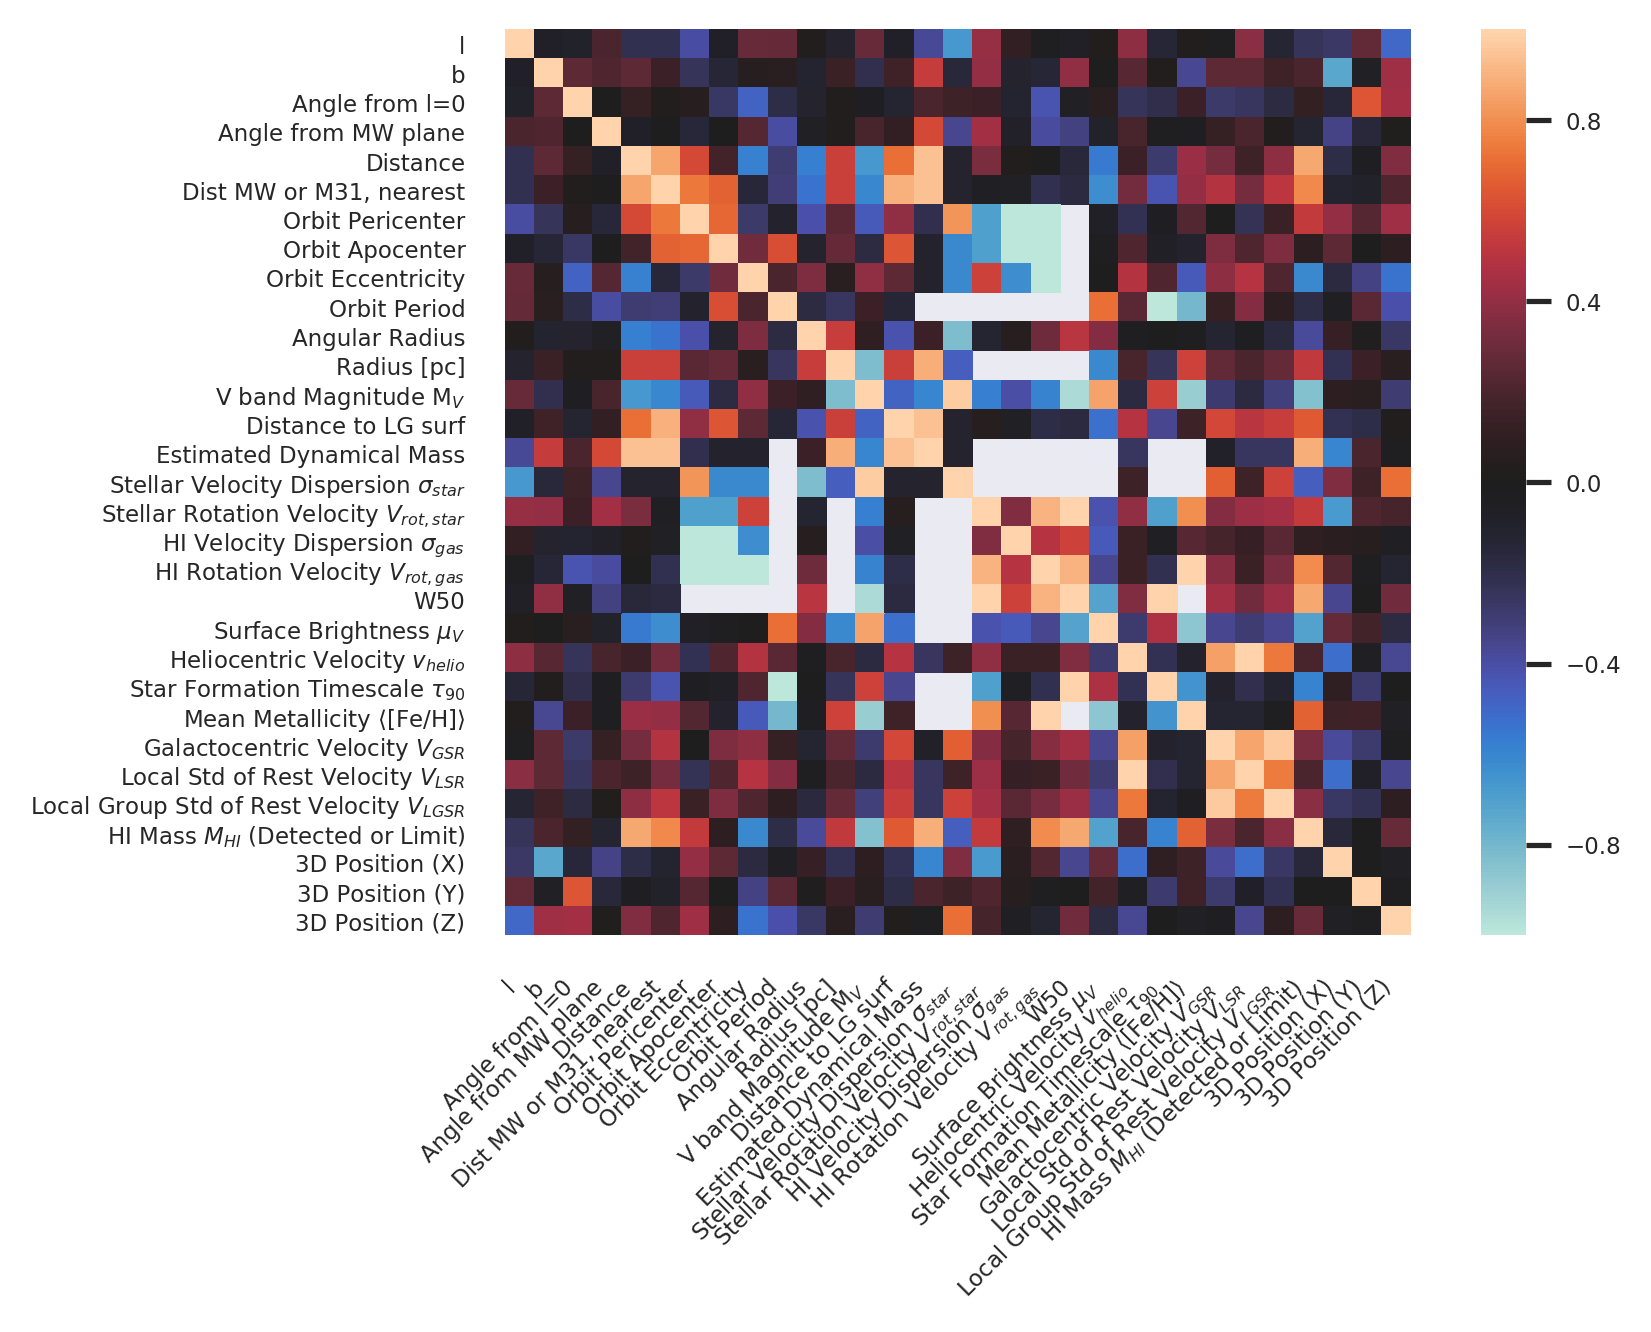

In [30]:
#Plot the Spearman correlation matrix as a heatmap
sb.set(font_scale=0.5) 
ax = sb.heatmap(
    spearman_matrix, 
    vmin=-1, vmax=1, center=0,
    #cmap=sb.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [32]:
col1 = 'l'
col2 =  'b'
overlap = galaxies[galaxies[col1].notna() & galaxies[col2].notna()][col1].count()
print(col1,col2,overlap)

l b 143


In [34]:
#Calculate the number of pairwise values for each pair of features since we have so much missing data
n_overlap = np.zeros((len(cols),len(cols)))
label = np.chararray((len(cols),len(cols)),itemsize=100)

for i, col1 in enumerate(cols):
    for j, col2 in enumerate(cols):
        n_overlap[i][j] = int(galaxies[galaxies[col1].notna() & galaxies[col2].notna()][col1].count())
        label[i][j] = str(col1)+'&'+str(col2)
        #print(str(col1[:3]),str(col2[:3]))
        #print(sum(galaxies[galaxies[col1].notna() & galaxies[col2].notna()][col1].notna()))
        print(i,col1,j,col2,int(n_overlap[i][j]))

0 l 0 l 143
0 l 1 b 143
0 l 2 Angle from l=0 143
0 l 3 Angle from MW plane 143
0 l 4 Distance 143
0 l 5 Dist MW or M31, nearest 137
0 l 6 Orbit Pericenter 42
0 l 7 Orbit Apocenter 42
0 l 8 Orbit Eccentricity 42
0 l 9 Orbit Period 11
0 l 10 Angular Radius 136
0 l 11 Radius [pc] 38
0 l 12 V band Magnitude M$_{V}$ 138
0 l 13 Distance to LG surf 137
0 l 14 Estimated Dynamical Mass 6
0 l 15 Stellar Velocity Dispersion $\sigma_{star}$ 5
0 l 16 Stellar Rotation Velocity $V_{rot,star}$ 12
0 l 17 HI Velocity Dispersion $\sigma_{gas}$ 35
0 l 18 HI Rotation Velocity $V_{rot,gas}$ 22
0 l 19 Surface Brightness $\mu_{V}$ 100
0 l 20 Heliocentric Velocity $v_{helio}$ 125
0 l 21 Star Formation Timescale $\tau_{90}$ 49
0 l 22 Mean Metallicity $\langle $[Fe/H]$\rangle $ 30
0 l 23 Galactocentric Velocity $V_{GSR}$ 125
0 l 24 Local Std of Rest Velocity $V_{LSR}$ 125
0 l 25 Local Group Std of Rest Velocity $V_{LGSR}$ 125
0 l 26 HI Mass $M_{HI}$ (Detected or Limit) 139
0 l 27 3D Position (X) 143
0 l 28 3D Po

7 Orbit Apocenter 21 Star Formation Timescale $\tau_{90}$ 24
7 Orbit Apocenter 22 Mean Metallicity $\langle $[Fe/H]$\rangle $ 18
7 Orbit Apocenter 23 Galactocentric Velocity $V_{GSR}$ 42
7 Orbit Apocenter 24 Local Std of Rest Velocity $V_{LSR}$ 42
7 Orbit Apocenter 25 Local Group Std of Rest Velocity $V_{LGSR}$ 42
7 Orbit Apocenter 26 HI Mass $M_{HI}$ (Detected or Limit) 41
7 Orbit Apocenter 27 3D Position (X) 42
7 Orbit Apocenter 28 3D Position (Y) 42
7 Orbit Apocenter 29 3D Position (Z) 42
8 Orbit Eccentricity 0 l 42
8 Orbit Eccentricity 1 b 42
8 Orbit Eccentricity 2 Angle from l=0 42
8 Orbit Eccentricity 3 Angle from MW plane 42
8 Orbit Eccentricity 4 Distance 42
8 Orbit Eccentricity 5 Dist MW or M31, nearest 41
8 Orbit Eccentricity 6 Orbit Pericenter 42
8 Orbit Eccentricity 7 Orbit Apocenter 42
8 Orbit Eccentricity 8 Orbit Eccentricity 42
8 Orbit Eccentricity 9 Orbit Period 11
8 Orbit Eccentricity 10 Angular Radius 41
8 Orbit Eccentricity 11 Radius [pc] 20
8 Orbit Eccentricity 12 V

13 Distance to LG surf 8 Orbit Eccentricity 41
13 Distance to LG surf 9 Orbit Period 11
13 Distance to LG surf 10 Angular Radius 134
13 Distance to LG surf 11 Radius [pc] 38
13 Distance to LG surf 12 V band Magnitude M$_{V}$ 134
13 Distance to LG surf 13 Distance to LG surf 137
13 Distance to LG surf 14 Estimated Dynamical Mass 6
13 Distance to LG surf 15 Stellar Velocity Dispersion $\sigma_{star}$ 5
13 Distance to LG surf 16 Stellar Rotation Velocity $V_{rot,star}$ 11
13 Distance to LG surf 17 HI Velocity Dispersion $\sigma_{gas}$ 34
13 Distance to LG surf 18 HI Rotation Velocity $V_{rot,gas}$ 20
13 Distance to LG surf 19 Surface Brightness $\mu_{V}$ 97
13 Distance to LG surf 20 Heliocentric Velocity $v_{helio}$ 120
13 Distance to LG surf 21 Star Formation Timescale $\tau_{90}$ 49
13 Distance to LG surf 22 Mean Metallicity $\langle $[Fe/H]$\rangle $ 30
13 Distance to LG surf 23 Galactocentric Velocity $V_{GSR}$ 120
13 Distance to LG surf 24 Local Std of Rest Velocity $V_{LSR}$ 120
13 

17 HI Velocity Dispersion $\sigma_{gas}$ 28 3D Position (Y) 35
17 HI Velocity Dispersion $\sigma_{gas}$ 29 3D Position (Z) 35
18 HI Rotation Velocity $V_{rot,gas}$ 0 l 22
18 HI Rotation Velocity $V_{rot,gas}$ 1 b 22
18 HI Rotation Velocity $V_{rot,gas}$ 2 Angle from l=0 22
18 HI Rotation Velocity $V_{rot,gas}$ 3 Angle from MW plane 22
18 HI Rotation Velocity $V_{rot,gas}$ 4 Distance 22
18 HI Rotation Velocity $V_{rot,gas}$ 5 Dist MW or M31, nearest 20
18 HI Rotation Velocity $V_{rot,gas}$ 6 Orbit Pericenter 2
18 HI Rotation Velocity $V_{rot,gas}$ 7 Orbit Apocenter 2
18 HI Rotation Velocity $V_{rot,gas}$ 8 Orbit Eccentricity 2
18 HI Rotation Velocity $V_{rot,gas}$ 9 Orbit Period 0
18 HI Rotation Velocity $V_{rot,gas}$ 10 Angular Radius 21
18 HI Rotation Velocity $V_{rot,gas}$ 11 Radius [pc] 0
18 HI Rotation Velocity $V_{rot,gas}$ 12 V band Magnitude M$_{V}$ 21
18 HI Rotation Velocity $V_{rot,gas}$ 13 Distance to LG surf 20
18 HI Rotation Velocity $V_{rot,gas}$ 14 Estimated Dynamical Mas

26 HI Mass $M_{HI}$ (Detected or Limit) 0 l 139
26 HI Mass $M_{HI}$ (Detected or Limit) 1 b 139
26 HI Mass $M_{HI}$ (Detected or Limit) 2 Angle from l=0 139
26 HI Mass $M_{HI}$ (Detected or Limit) 3 Angle from MW plane 139
26 HI Mass $M_{HI}$ (Detected or Limit) 4 Distance 139
26 HI Mass $M_{HI}$ (Detected or Limit) 5 Dist MW or M31, nearest 137
26 HI Mass $M_{HI}$ (Detected or Limit) 6 Orbit Pericenter 41
26 HI Mass $M_{HI}$ (Detected or Limit) 7 Orbit Apocenter 41
26 HI Mass $M_{HI}$ (Detected or Limit) 8 Orbit Eccentricity 41
26 HI Mass $M_{HI}$ (Detected or Limit) 9 Orbit Period 11
26 HI Mass $M_{HI}$ (Detected or Limit) 10 Angular Radius 136
26 HI Mass $M_{HI}$ (Detected or Limit) 11 Radius [pc] 38
26 HI Mass $M_{HI}$ (Detected or Limit) 12 V band Magnitude M$_{V}$ 136
26 HI Mass $M_{HI}$ (Detected or Limit) 13 Distance to LG surf 137
26 HI Mass $M_{HI}$ (Detected or Limit) 14 Estimated Dynamical Mass 6
26 HI Mass $M_{HI}$ (Detected or Limit) 15 Stellar Velocity Dispersion $\sigma

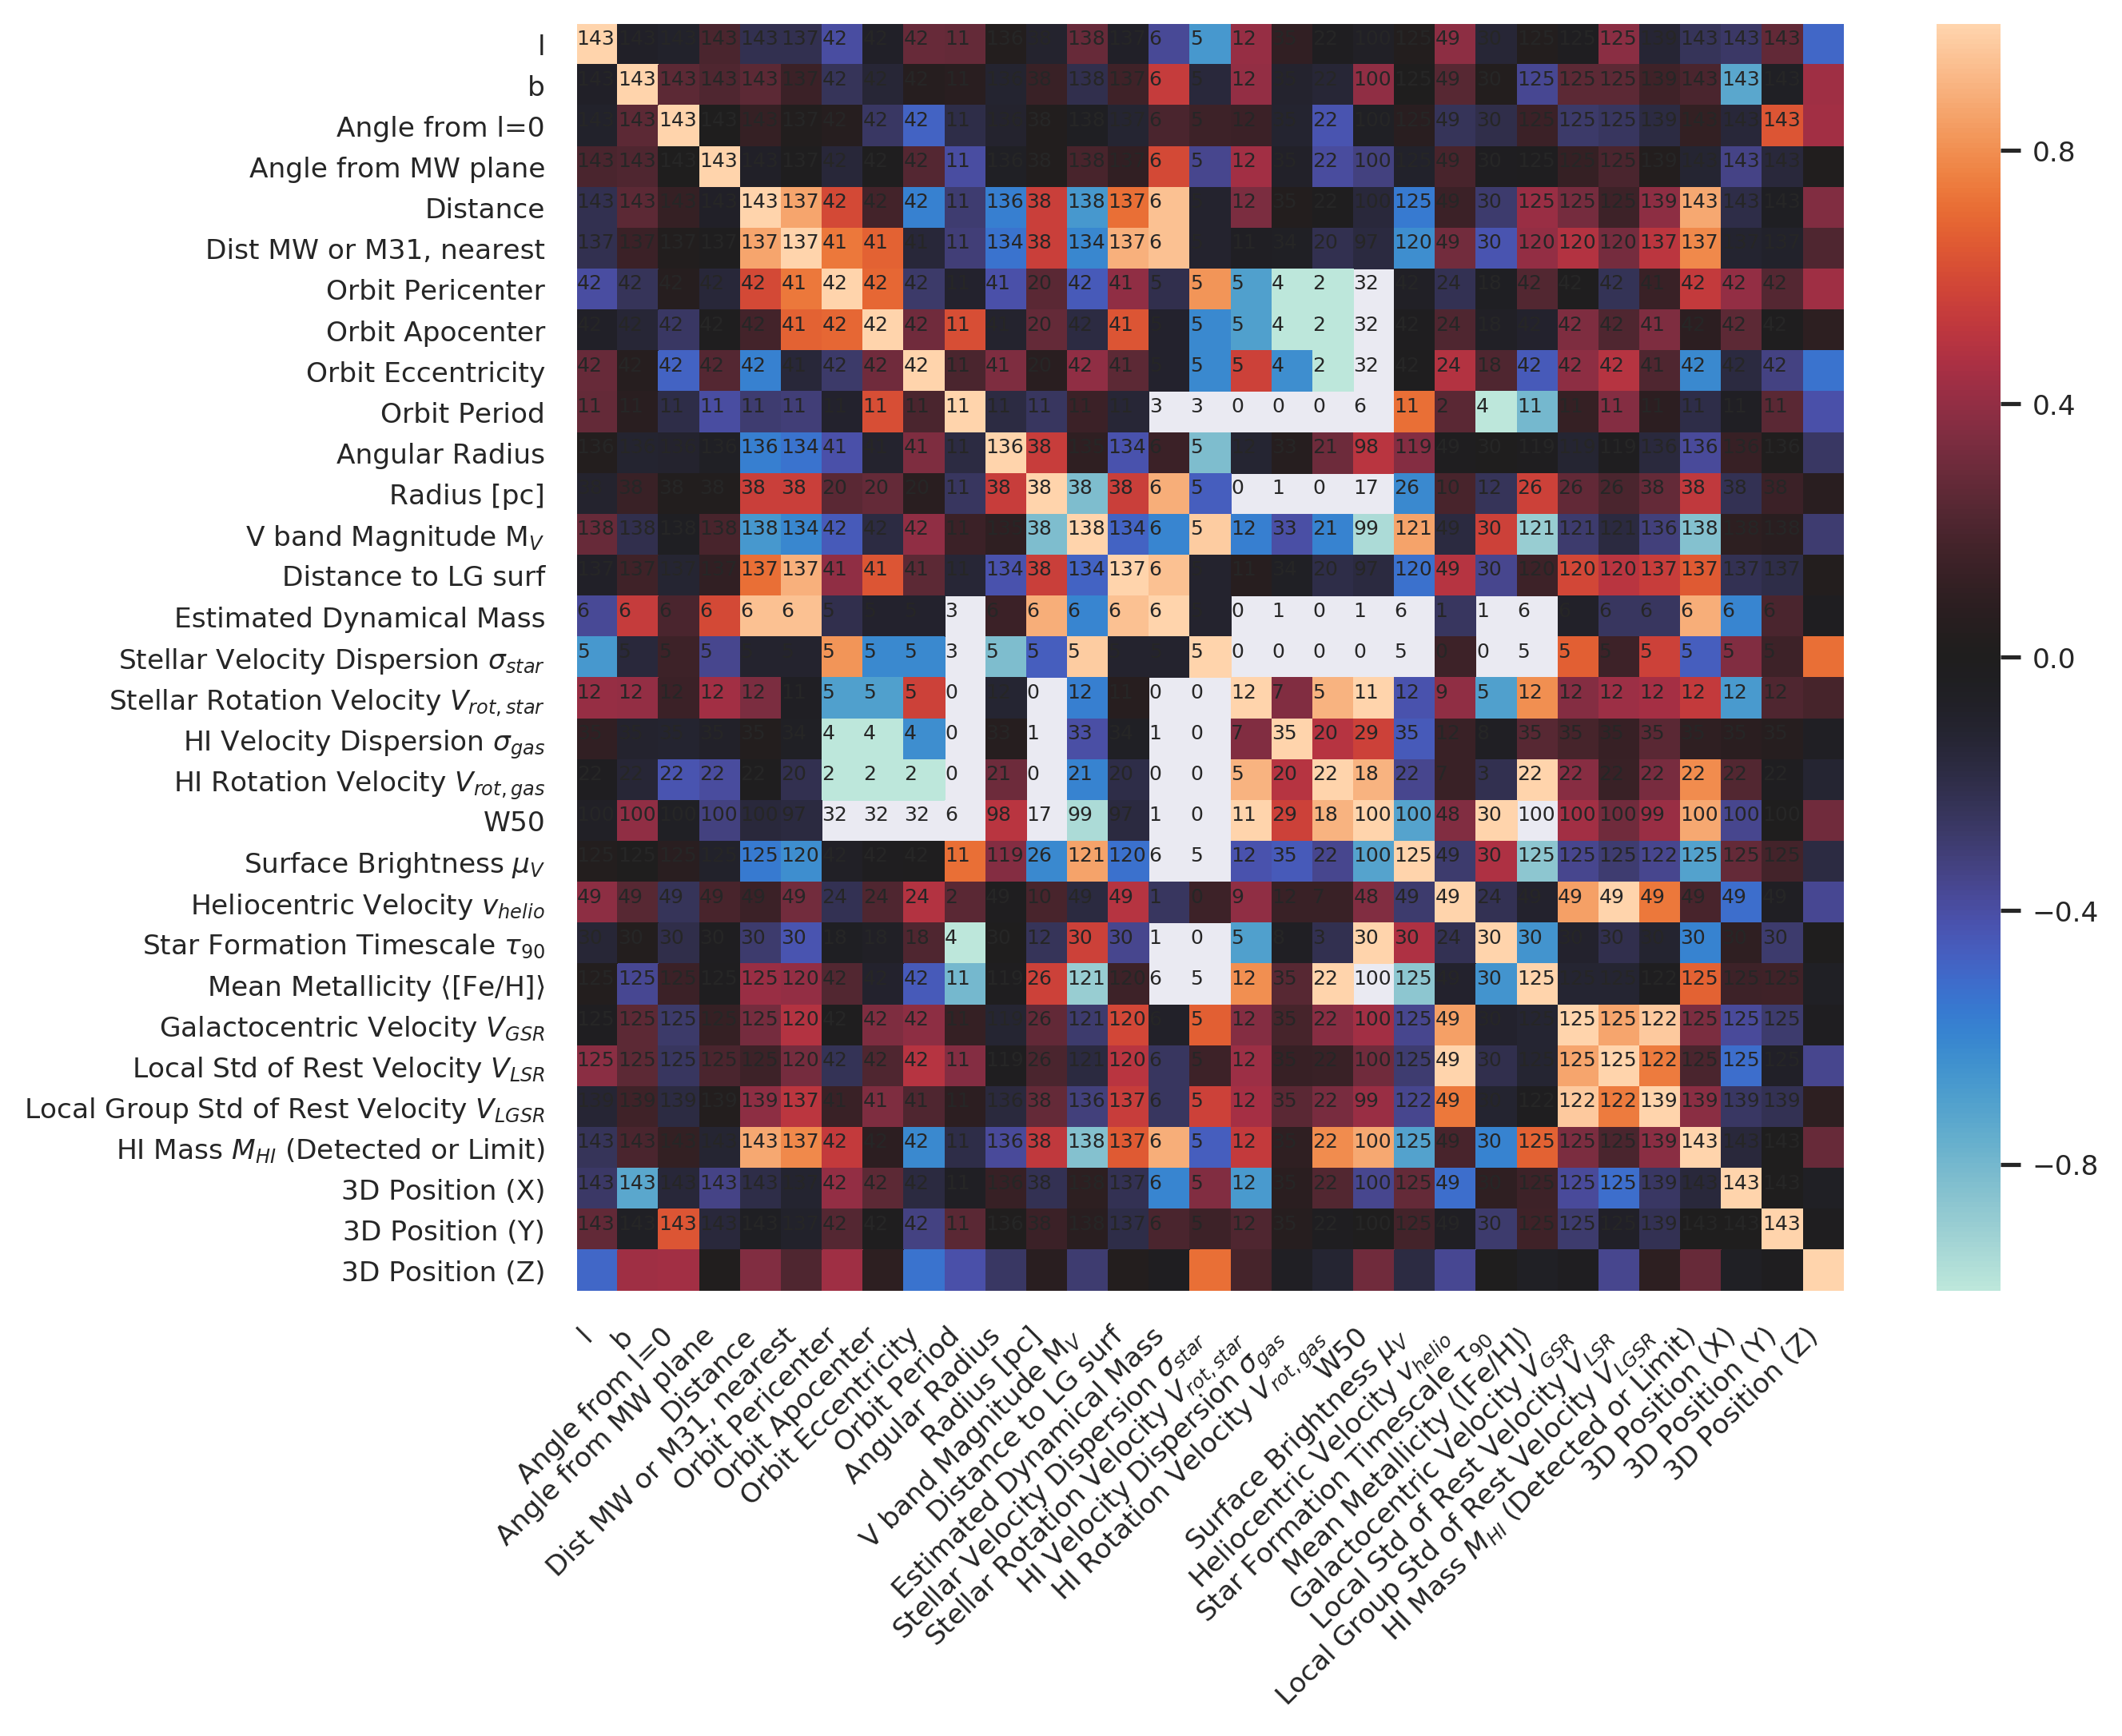

In [35]:
#Plot the correlation with the number of pairwise values that are not missing from the data overlaid on the heatmap
sb.set(font_scale=0.75)
a4_dims = (10, 7)
fig, ax = plt.subplots(figsize=a4_dims)

ax = sb.heatmap(
    spearman_matrix, 
    vmin=-1, vmax=1, center=0,
    #cmap=sb.diverging_palette(20, 220, n=200),
    square=True
);
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0,
    horizontalalignment='right'
);


height, width = n_overlap.shape
xpos, ypos = np.meshgrid(np.arange(width), np.arange(height)+0.5)
sb.set(font_scale=0.5)

for x, y, N in zip(xpos.flat, ypos.flat, n_overlap.flat):
    ax.text(x, y, str(int(N)))

In [44]:
col1 = 'Orbit Period'
col2 = 'Star Formation Timescale $\\tau_{90}$'
sum(galaxies[galaxies[col1].notna() & galaxies[col2].notna()]['l'].notna())

2

# Parameter Subset

In [37]:
Sub = pd.read_csv('./galaxysub.csv')

In [38]:
#Read in table of possible subset data for regression
Sub

,GalaxyName,MHI,V_GSR,min_dist_mw_or_m31,M_star,L_V,tau_90,M_V
0,#TheGalaxy,99.9,NaN,NaN,NaN,NaN,NaN,NaN
1,#*CanisMajor,99.9,-115.289002,NaN,NaN,4.875285e+07,NaN,-14.39
2,SagittariusdSph,0.0,172.923646,18.587576,21.0,2.147830e+07,NaN,-13.50
3,TucanaIII,99.9,-191.421092,23.298941,NaN,7.870458e+02,NaN,-2.41
4,DracoII,99.9,-170.461213,26.126576,NaN,1.235947e+03,NaN,-2.90
...,...,...,...,...,...,...,...,...
138,HydrusI,NaN,-84.947393,25.741743,NaN,6.546362e+03,NaN,-4.71
139,CarinaII,NaN,252.414541,37.296364,NaN,5.395106e+03,NaN,-4.50
140,CarinaIII,NaN,59.593891,29.180644,NaN,7.798301e+02,NaN,-2.40
141,CraterII,NaN,-72.443765,116.471698,NaN,1.629296e+05,NaN,-8.20


In [39]:
#drop names
Sub.drop('GalaxyName',axis=1,inplace=True)

In [48]:
Sub.dtypes

MHI                   float64
V_GSR                 float64
min_dist_mw_or_m31    float64
M_star                float64
L_V                   float64
tau_90                float64
M_V                   float64
dtype: object

## Prepare MHI Column for Regression: Upper limits set to 0

In [51]:
galaxies[['GalaxyName','MHI_computed','MHI_type']]

,GalaxyName,MHI_computed,MHI_type
0,#TheGalaxy,NaN,NaN
1,#*CanisMajor,NaN,NaN
2,SagittariusdSph,122.454082,upper_limit
3,TucanaIII,90.189022,upper_limit
4,DracoII,56.714447,upper_limit
...,...,...,...
138,HydrusI,124.584324,upper_limit
139,CarinaII,220.814382,upper_limit
140,CarinaIII,101.226583,upper_limit
141,CraterII,3010.646100,upper_limit


In [66]:
np.array(galaxies['MHI_computed'])

array([           nan,            nan, 1.22454082e+02, 9.01890225e+01,
       5.67144473e+01, 4.66567561e+01, 1.32748927e+02, 1.27440000e+02,
       1.07356362e+02, 1.12669244e+02, 1.84868117e+02, 2.69036964e+02,
       5.16132000e+03, 1.05443975e+02, 1.63123200e+02, 1.07584048e+02,
       3.97754400e+02, 4.60000000e+08, 3.85506000e+02, 2.11790243e+02,
       6.95823816e+02, 4.60000000e+08, 5.70605038e+02, 5.92357662e+02,
       6.00832181e+02, 7.75344960e+02, 7.64320754e+02, 1.07414585e+03,
       8.32687757e+02, 3.22348196e+03, 3.91732158e+02, 1.01872704e+03,
       1.41600000e+03, 6.81155129e+03, 2.16585291e+03, 1.86665154e+03,
       1.14511105e+03, 1.53468397e+03, 3.23562771e+03, 3.40092593e+03,
       2.28769678e+03, 2.37235507e+03, 2.93521528e+03, 1.62536977e+03,
       5.21624664e+03, 3.10967835e+03, 6.14875033e+03, 5.13778326e+03,
       4.45469186e+03, 1.02317215e+04,            nan, 1.76702824e+05,
       5.53346243e+04, 4.00000000e+05, 7.54901990e+04, 4.17924415e+04,
      

In [76]:
# create a column of HI masses for regression, setting all NaNs and upper limits to zero

MHI_regression = np.zeros(len(np.array(galaxies['MHI_computed'])))

for i, MHI_type in enumerate(np.array(galaxies['MHI_type'])):
    if pd.isnull(MHI_type) or (MHI_type == 'upper_limit'):
        MHI_regression[i] = 0.
    else:
        MHI_regression[i] = galaxies['MHI_computed'][i]
    print (galaxies['GalaxyName'][i], MHI_regression[i], galaxies['MHI_computed'][i], MHI_type)

print ('\n',np.mean(MHI_regression), np.count_nonzero(MHI_regression>0.))

#TheGalaxy 0.0 nan nan
#*CanisMajor 0.0 nan nan
SagittariusdSph 0.0 122.45408185265198 upper_limit
TucanaIII 0.0 90.1890225 upper_limit
DracoII 0.0 56.714447261999986 upper_limit
Segue1 0.0 46.65675611252086 upper_limit
Reticulum2 0.0 132.74892698458365 upper_limit
CetusII 0.0 127.44 upper_limit
TriangulumII 0.0 107.35636224 upper_limit
UrsaMajorII 0.0 112.66924433808 upper_limit
BootesII 0.0 184.86811728 upper_limit
SegueII 0.0 269.0369643093985 upper_limit
Willman1 0.0 5161.319999999999 upper_limit
ComaBerenices 0.0 105.44397494399999 upper_limit
TucanaIV 0.0 163.1232 upper_limit
BootesIII 0.0 107.5840481541017 upper_limit
GrusII 0.0 397.7544 upper_limit
LMC 460000000.0 460000000.0 detected_mass
TucanaV 0.0 385.506 upper_limit
TucanaII 0.0 211.79024266227847 upper_limit
SagittariusII 0.0 695.8238159999999 upper_limit
SMC 460000000.0 460000000.0 detected_mass
Bootes 0.0 570.6050379717902 upper_limit
Draco 0.0 592.3576622117649 upper_limit
UrsaMinor 0.0 600.8321809919997 upper_limit
Ho

In [40]:
#define x and y
y = Sub['MHI']
x = Sub.drop('MHI',axis=1)

In [ ]:
# print the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
LR = LinearRegression()

In [ ]:
LR.fit(x_train,y_train)